# 12.1.1 Maximum variance formulation of PCA
Old Faithful data from [here](http://research.microsoft.com/en-us/um/people/cmbishop/PRML/webdatasets/faithful.txt).

In [1]:
from IPython.display import display
from ipywidgets import interactive_output, FloatSlider, VBox, Layout
import matplotlib
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import numpy as np

## Load the data and standarize

In [2]:
data = np.loadtxt('../data/old_faithful/faithful.txt', dtype=str, delimiter=' ')
data = data.astype(np.float64)
data.shape

(272, 2)

In [3]:
N = data.shape[0]  # number of data points
D = data.shape[1]  # dimension of data
print(f'{N=}, {D=}')

N=272, D=2


In [4]:
 # standarize the data
MEAN = np.mean(data, axis=0, keepdims=True)
SD = np.std(data, axis=0, keepdims=True) 
X = (data - MEAN) / SD 

In [5]:
# confirm zero mean
np.mean(X, axis=0)

array([4.48579082e-16, 4.27048103e-16])

In [6]:
# confirm unit variance
np.std(X, axis=0)  

array([1., 1.])

In [7]:
x_bar = np.mean(X, axis=0)  #  (12.1)
S = (X-x_bar).T @ (X-x_bar) / N  # (12.3)
S

array([[1.        , 0.90081117],
       [0.90081117, 1.        ]])

In [8]:
thetas = np.linspace(0, 2*np.pi, 100)

In [9]:
var = []
for theta in thetas:
    u_1 = np.array([np.cos(theta), np.sin(theta)])
    u_1 = u_1 / np.linalg.norm(u_1)  # normalize
    var.append(u_1.T @ S @ u_1)

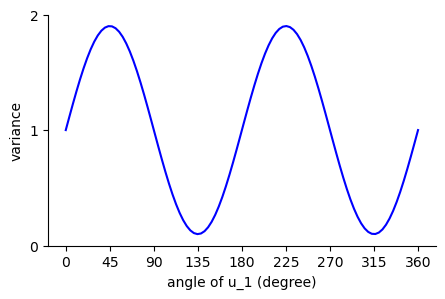

In [10]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(np.rad2deg(thetas), var, 'b')
ax.set_xlabel('angle of u_1 (degree)')
ax.set_ylabel('variance')
ax.set_xticks(np.arange(0, 361, 45))
ax.set_yticks(np.arange(0, 3, 1))
ax.set_ylim(0, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [11]:
def project(X, S, u_1):
    """Given an angle theta, project the data onto the unit vector

    Args:
        X (np.array): data points of shape (N, D)
        S (np.array): covariance matrix of shape (D, D)
        u_1 (np.array): projection direction as a unit vector of shape (D, 1)

    Returns:
        alpha (np.array): projected data of shape (N, )
        var (float): variance of the projected data
    """
    alpha = X @ u_1  # project data onto u_1
    var = u_1.T @ S @ u_1  # variance of projected data
    return alpha, var.item()

In [12]:
def plot_pca(theta_deg):
    theta = np.deg2rad(theta_deg)  # convert degree to radian
    u_1 = np.array([np.cos(theta), np.sin(theta)])  # orthonormal vector indicating the projection direction
    u_1 = u_1[:, np.newaxis]  # reshape to (D, 1)
    alpha, var = project(X, S, u_1) 
    X_tilde = alpha @ u_1.T  # projected points, shape: (N, D)

    lines = np.stack([X, X_tilde], axis=1)
    lc = LineCollection(lines, colors='b', linestyles=':', alpha=0.3)
      
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.add_collection(lc)
    ax1.scatter(X[:,0], X[:,1], edgecolor='g', facecolor='none', s=60, lw=1.5)  # original data points
    ax1.scatter(X_tilde[:,0], X_tilde[:,1], edgecolor='b', facecolor='none', s=10, lw=1)  # projected points
    ax1.plot([-3*u_1[0],  3*u_1[0]], [-3*u_1[1],  3*u_1[1]], color='red', lw=2)  # projection direction
    ax1.set_xticks(np.arange(-2, 3, 2))
    ax1.set_yticks(np.arange(-2, 3, 2))
    ax1.set_xlim(-2.4, 2.4)
    ax1.set_ylim(-2.4, 2.4)
    ax1.set_aspect('equal', 'box')
    
    # histogram of projected values
    ax2.hist(alpha, bins=np.linspace(-3, 3, 40), color='blue', edgecolor='none')
    ax2.set_title(f'variance: {var:.3f}', fontsize=14)
    ax2.set_xlabel('Projected value', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(0, 60)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [ ]:
theta_slider = FloatSlider(
    min=-0,
    max=360,
    step=1,
    value=0.0,
    description='direction of u_1 (deg):',
    continuous_update=True,
    readout_format='.2f'
)

In [14]:
out = interactive_output(plot_pca, {'theta_deg': theta_slider})

In [15]:
display(VBox([theta_slider, out]))